In [15]:
#!pip install cv2

In [16]:
#!pip install scipy

In [17]:
#!pip install opencv-python

In [18]:
import cv2

In [19]:
image = cv2.imread('test2.jpg')

In [20]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Edge detection
edges = cv2.Canny(thresh, 50, 150)


In [21]:
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Approximate contours to polylines
paths = [cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True) for cnt in contours]


In [22]:
# Draw paths and points
#for path in paths:
#    cv2.drawContours(image, [path], -1, (0, 255, 0), 2)
#cv2.imshow('Paths', image)
#cv2.waitKey(0)


In [23]:
import numpy as np
from scipy.interpolate import splprep, splev

def smooth_contour(contour, smoothing_factor=3):
    # Extract x and y coordinates from the contour
    x = contour[:, 0, 0]
    y = contour[:, 0, 1]

    # Check if the number of points is sufficient
    num_points = len(x)
    if num_points < 4:  # Minimum required for cubic spline (degree 3)
        #raise ValueError("Contour has too few points for smoothing")
        return None

    # Dynamically determine the spline degree
    k = min(3, num_points - 1)  # Degree must be < number of points

    # Fit a spline to the points
    tck, _ = splprep([x, y], s=smoothing_factor, k=k)

    # Generate smoothed points
    smooth_x, smooth_y = splev(np.linspace(0, 1, max(100, num_points)), tck)

    # Combine smoothed points into a contour
    smoothed_contour = np.array(list(zip(smooth_x, smooth_y)), dtype=np.int32).reshape(-1, 1, 2)
    return smoothed_contour


In [24]:
# Smooth all detected paths
smoothed_paths = [smooth_contour(path) for path in paths]


In [25]:
# Visualize smoothed paths
import cv2
for smoothed_path in smoothed_paths:
    cv2.polylines(image, [smoothed_path], isClosed=False, color=(0, 255, 0), thickness=2)

cv2.imshow('Smoothed Paths', image)
#cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
# Smooth the binary image of edges
smoothed_edges = cv2.GaussianBlur(edges, (5, 5), 0)

# Re-extract contours after smoothing
contours, _ = cv2.findContours(smoothed_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


In [27]:
paths = [cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True) for cnt in contours]
#paths = [cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True) for cnt in smoothed_edges]


In [28]:
# Draw paths and points
for path in paths:
    cv2.drawContours(image, [path], -1, (0, 255, 0), 2)
cv2.imshow('Paths', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

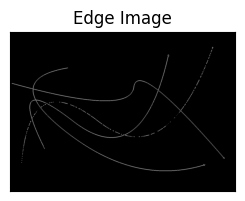

In [34]:
#!pip install matplotlib
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#plt.subplot(100),plt.imshow(image,cmap = 'gray')
#plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

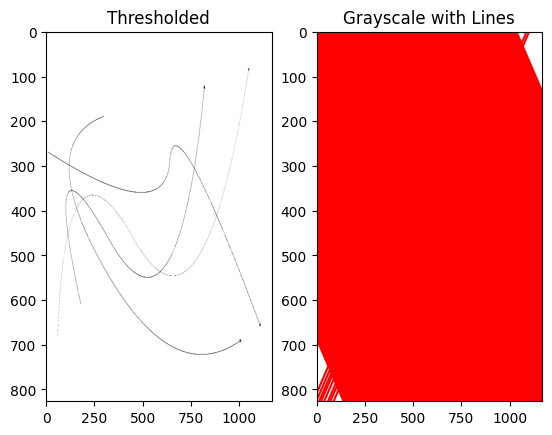

In [54]:
image = cv2.imread("test2.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

fig, axs = plt.subplots(1, 2)
axs[0].set_title("Thresholded")
axs[0].imshow(thresh, aspect="auto", cmap="gray")

lines = cv2.HoughLinesP(thresh, rho=1, theta=np.pi/180.0, threshold=256, minLineLength=10, maxLineGap=10)
lines = lines.squeeze()
axs[1].set_title("Grayscale with Lines")
axs[1].imshow(thresh, aspect="auto", cmap="gray")
for x1, y1, x2, y2 in lines:
    axs[1].plot([x1, x2], [y1, y2], "r")
#fig.show()

In [53]:
import cv2


raw_image = cv2.imread('test2.jpg')

In [ ]:
gray_image = cv2.cvtColor(raw_image, cv2.BGR2GRAY)

